In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/ARZOO/OneDrive/Desktop/mcdonalds.csv")

In [3]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
df["Like"].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [6]:
df=df.replace(to_replace="I hate it!-5",value="-5")

In [7]:
df=df.replace(to_replace="I love it!+5",value="+5")

In [8]:
df["Like"].value_counts()

+3    229
+2    187
0     169
+4    160
+1    152
-5    152
+5    143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

In [9]:
df["Like"]=df["Like"].astype(dtype="int64")

In [10]:
df["Like"].dtype

dtype('int64')

In [11]:
df["Like"].value_counts()

 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

In [12]:
df.corr()

,Like,Age
Like,1.000000,-0.251491
Age,-0.251491,1.000000


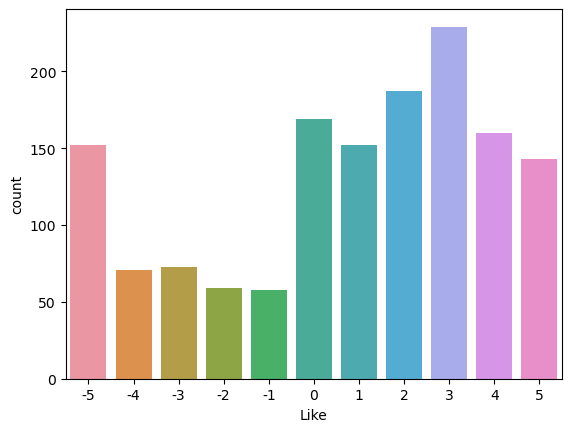

In [13]:
sns.countplot(data=df,x="Like")

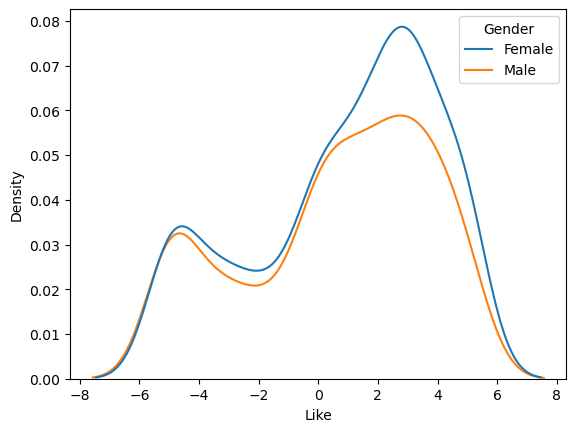

In [14]:
sns.kdeplot(data=df,x="Like",hue="Gender")

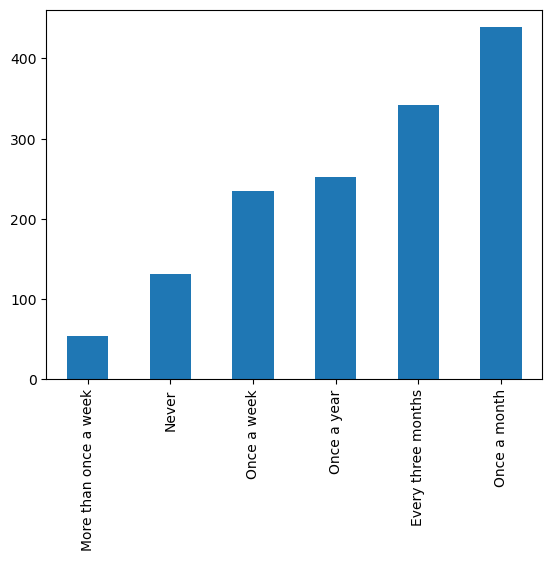

In [15]:
df["VisitFrequency"].value_counts().sort_values().plot(kind="bar")

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

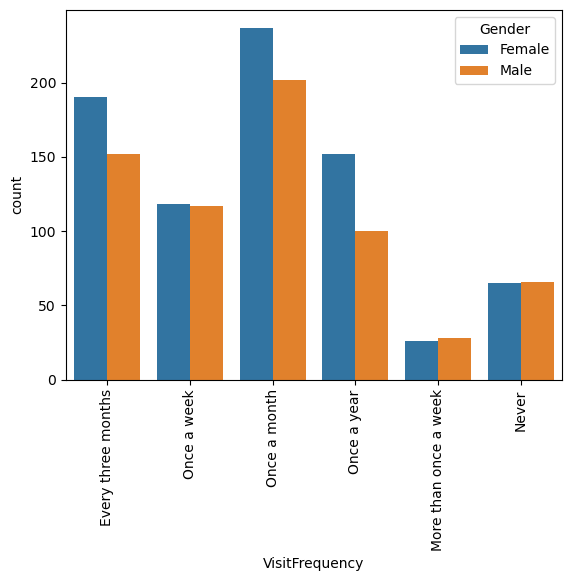

In [16]:
sns.countplot(data=df,x="VisitFrequency",hue="Gender")
plt.xticks(rotation=90)

In [17]:
cols = df.drop(["Like","Age"],axis=1).columns
cols

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'VisitFrequency',
       'Gender'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
for col in cols:
    df[col] = le.fit_transform(df[col])

In [21]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int32
 1   convenient      1453 non-null   int32
 2   spicy           1453 non-null   int32
 3   fattening       1453 non-null   int32
 4   greasy          1453 non-null   int32
 5   fast            1453 non-null   int32
 6   cheap           1453 non-null   int32
 7   tasty           1453 non-null   int32
 8   expensive       1453 non-null   int32
 9   healthy         1453 non-null   int32
 10  disgusting      1453 non-null   int32
 11  Like            1453 non-null   int64
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int32
 14  Gender          1453 non-null   int32
dtypes: int32(13), int64(2)
memory usage: 96.6 KB


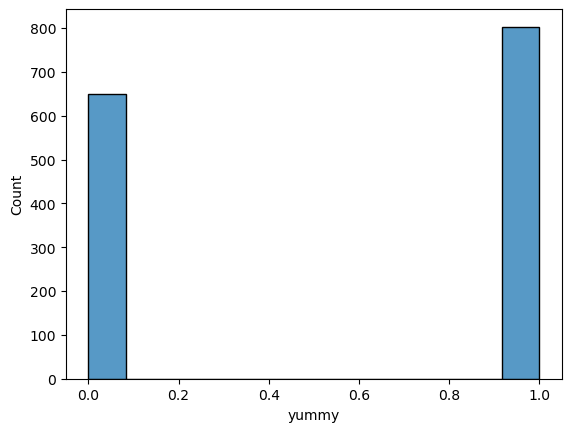

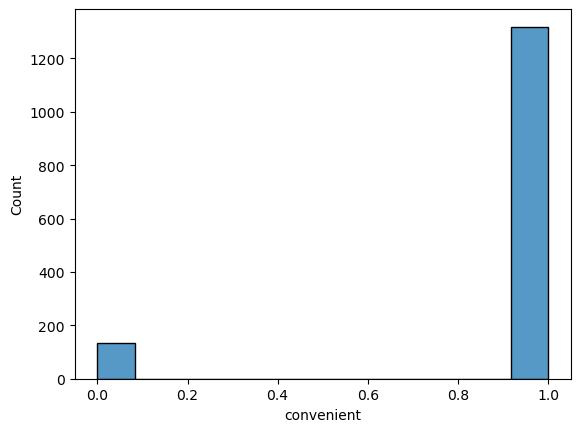

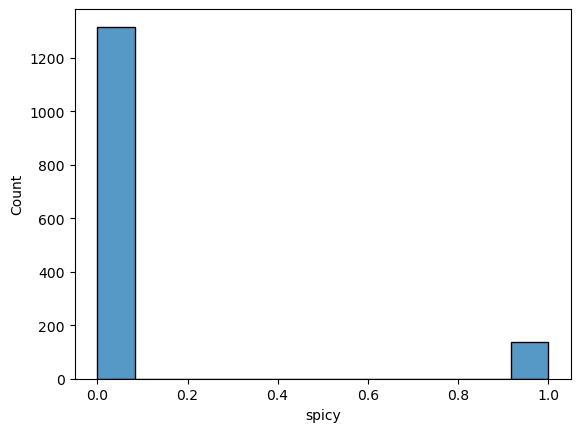

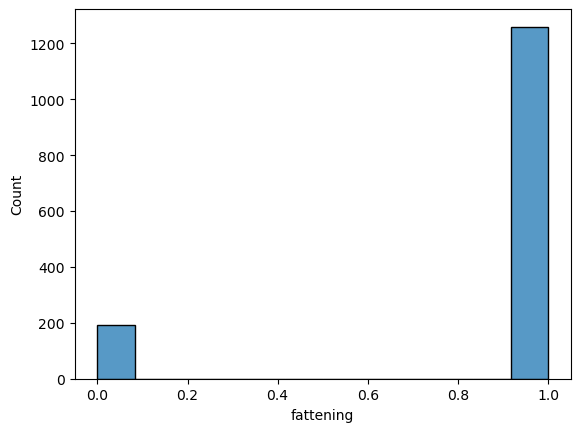

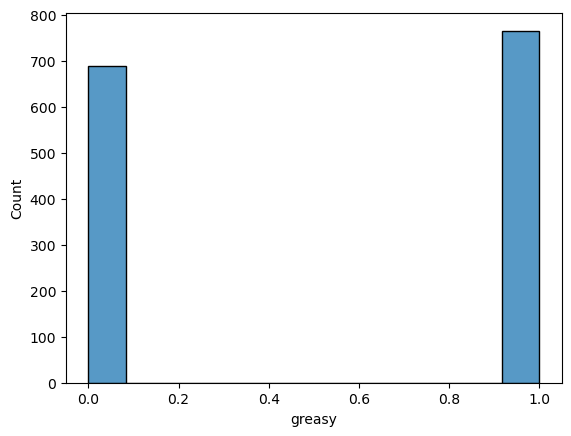

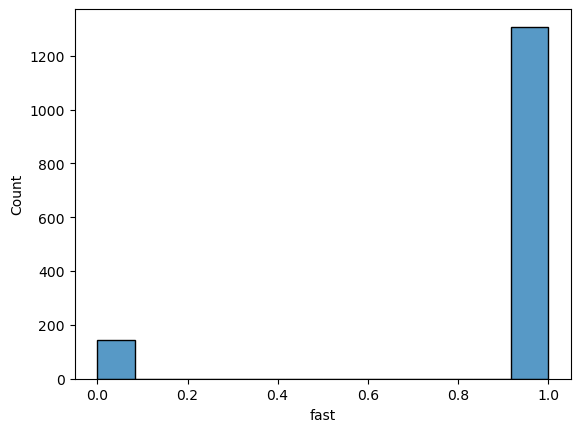

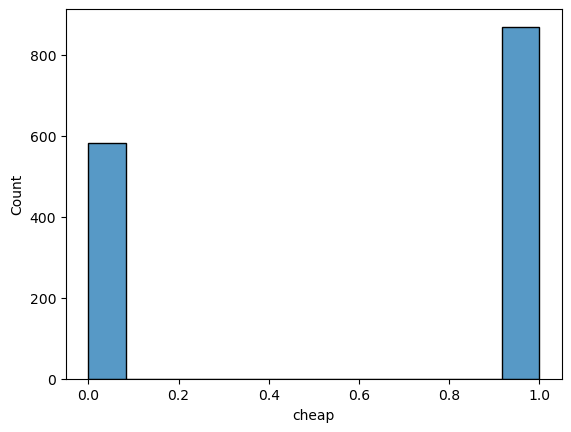

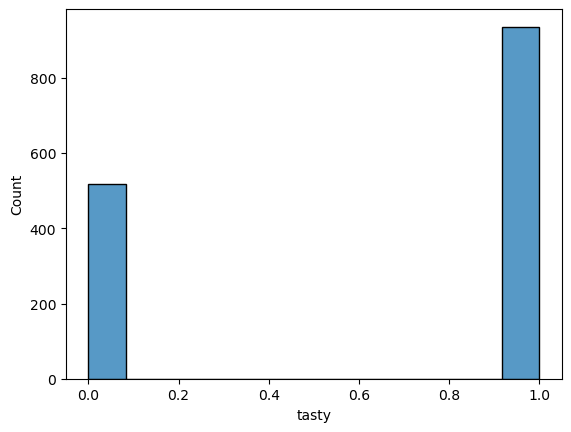

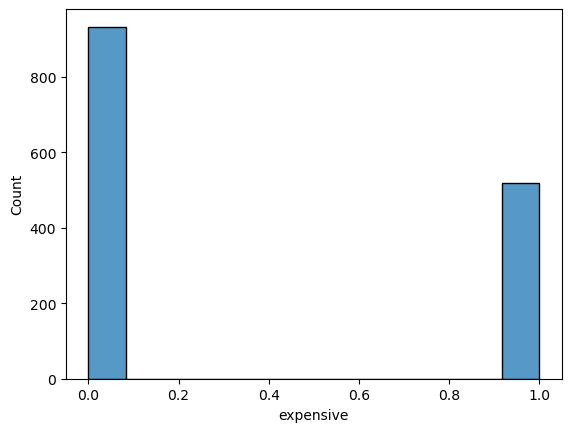

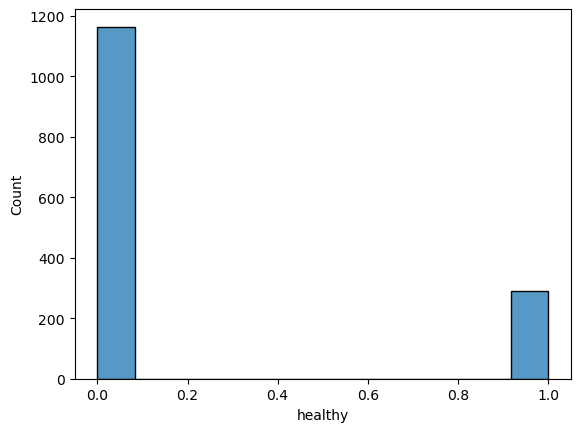

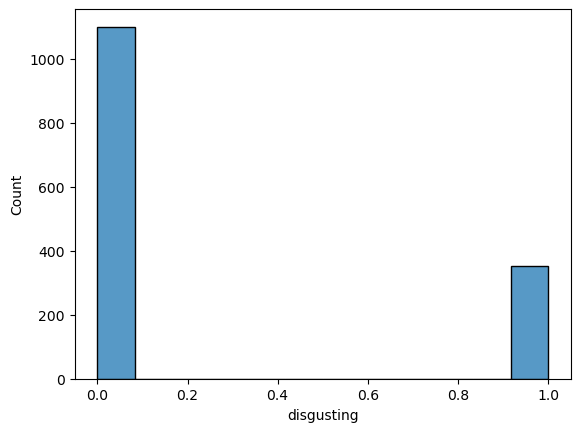

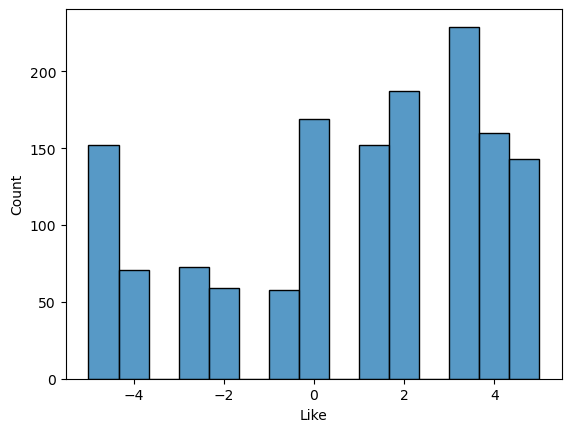

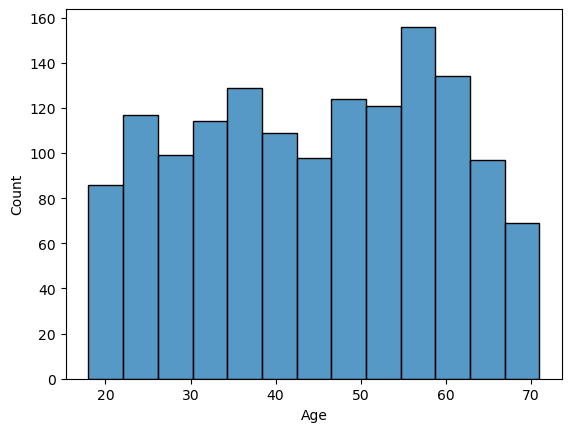

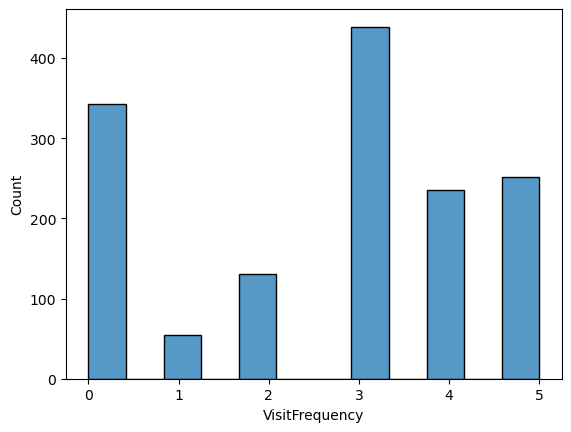

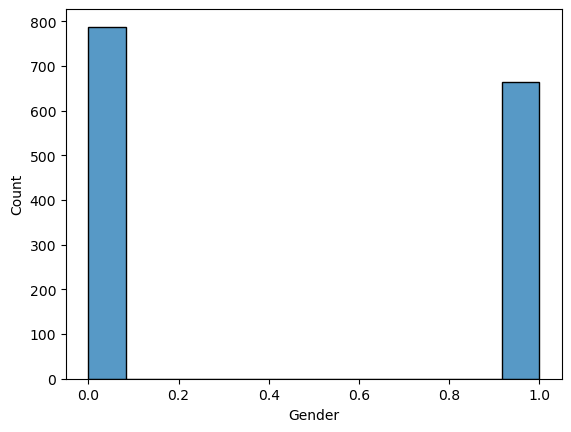

In [23]:
for col in df.columns:
    sns.histplot(data=df,x=col)
    plt.show()

In [24]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(df)

pca = PCA(n_components=11)
pc = pca.fit_transform(df)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-16.606821,2.737596,2.658937,-0.184135,-0.085550,0.614728,-0.334606,-0.340941,-0.245429,-0.393405,-0.199439
1,-6.311508,-1.730414,2.549844,0.114682,-0.805905,-0.128484,0.454746,-0.141242,-0.040777,-0.064510,-0.138896
2,-17.362504,-1.297073,2.530020,0.759636,-0.703057,0.133261,0.328141,0.727055,-0.765063,-0.577954,0.519133
3,-24.149805,-4.522681,-1.631206,-0.171408,-1.041904,-0.770924,0.161412,0.255296,0.882876,-0.016158,-0.102677
4,-4.321202,-1.360049,-0.434652,-0.280248,0.281624,-0.823979,-0.572841,0.777941,-0.660973,-0.152787,-0.483986
...,...,...,...,...,...,...,...,...,...,...,...
1448,-2.717759,5.880167,-2.142012,0.901472,0.174079,-0.236890,0.093015,0.144229,0.118021,0.305224,-0.197423
1449,8.667513,-0.824274,-1.365741,-0.596842,0.148021,0.801521,0.297992,0.345768,0.043216,0.356581,-0.435100
1450,-7.246629,-2.686686,-0.481825,0.816807,-0.393587,0.628035,0.060242,-0.474235,0.165393,-0.184896,-0.067056
1451,3.772398,-3.248566,2.529782,-0.401722,1.041206,0.173455,0.175137,0.617421,-0.052905,0.165072,0.012837


In [25]:
pca.explained_variance_ratio_

array([9.34326142e-01, 4.33202794e-02, 1.41450347e-02, 1.90130939e-03,
       1.12391725e-03, 1.07016803e-03, 8.78370318e-04, 7.17077706e-04,
       5.03637587e-04, 4.40756841e-04, 3.65603628e-04])